<br>

#### 1. 단어의 검색 결과 출력하기
- 다음 사전 (https://alldic.daum.net) 에 ‘happiness’ 단어를 검색하였을 때 출력 되는 화면에서 단어와 단어의 의미를 출력한다

In [1]:
!pip install beautifulsoup4==4.7.1

In [3]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen 

In [ ]:
'''
pip install opencv-python
import cv2

pip install pillow
import PIL #Python Image Library

https://alldic.daum.net/search.do?q=happiness&age=22&new=True --> ? 이후의 것들 == query
'''



In [11]:
# 검색하고 싶은 단어 입력하기
word = 'happiness'

# 불러오려는 url 입력하기 
# 디폴트 url에 string 타입의 word 변수를 합쳐서 url 변수 생성
url = 'https://alldic.daum.net/search.do?q=' + word

# urlopen 함수를 통해 web 변수를 생성
web = urlopen(url)   # urlopen(url).read().decode('utf-8')

# BeautifulSoup으로 web 페이지상의 HTML 구조를 파싱
web_page = BeautifulSoup(web, 'html.parser')

print(web_page)

<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>happiness – 다음 어학사전</title>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="noindex, nofollow" name="robots"/>
<meta content="http://t1.daumcdn.net/thumb/P270x270/?fname=http%3A%2F%2Ft1.daumcdn.net%2Flanguage%2Fcommon_icon%2F557565CB040E530001" property="og:image">
<meta content="website" property="og:type"/>
<meta content="Daum 사전" property="og:site_name"/>
<meta content="1.행복 2.만족 3.기쁨 4.행운 " property="og:description"/>
<meta content="summary_large_image" name="twitter:card"/>
<meta content="Daum 사전" name="twitter:title"/>
<meta content="" name="twitter:site"/>
<meta content="" name="twitter:creator"/>
<meta content="1.행복 2.만족 3.기쁨 4.행운 " name="twitter:description"/>
<meta content="http://t1.daumcdn.net/thumb/P270x270/?fname=http%3A%2F%2Ft1.daumcdn.net%2Flanguage%2Fcommon_icon%2F557565CB040E530001" name="twitter:image"/>
<meta content="production"

#### Parser 들의 장단점
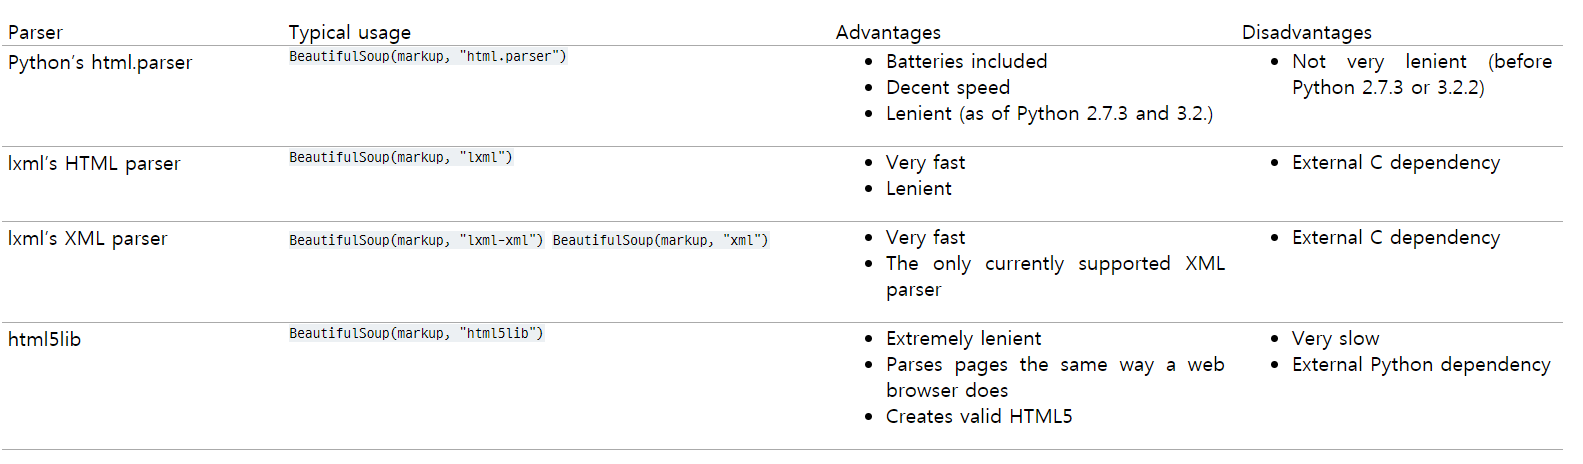

**Scraping에서 Parsing이란?**
- HTML이나 XML, JavaScript 등으로 쓰여진 소스들을 각 요소별로 나누는 것
- 이 때, 이러한 parsing을 진행해주는 것을 parser라고 부른다.

In [23]:
# 찾는 단어 (대상이 하나일 때)

box1 = web_page.find('span', {'class': 'txt_emph1'}) # 찾다 web_page.find('tag',{'attribute_name':'attribute_value'})
print(box1.get_text())
print()
print(box1.attrs)
# print(box1.get_?) # 태그를 걷어내고 내부의 텍스트만 꺼내고 싶을 때 

happiness

{'class': ['txt_emph1']}


In [28]:
# 단어의 뜻 (대상이 여러개일 때)

box2 = web_page.find_all('span', {'class': 'txt_search'}) # 모두 찾다
for element in box2:
    print(element.get_text())

행복
만족
기쁨
행운
행복을 가져다 주다
행복을 추구하다
행복을 바라다
state of well-being characterized by emotions ranging from contentment to intense joy
the right to try to find happiness
해피니스. 행복


In [29]:
# 단어와 단어의 뜻 출력하기

print(box1.get_text()) # get_ + Tab!
print()

for defintion in web_page.find_all('span', {'class': 'txt_search'}):
    print(defintion.get_text().strip()) # 앞부분의 공백을 지워주기 위해 strip() 적용

happiness

행복
만족
기쁨
행운
행복을 가져다 주다
행복을 추구하다
행복을 바라다
state of well-being characterized by emotions ranging from contentment to intense joy
the right to try to find happiness
해피니스. 행복


<br>
<br>

#### 2. 영화 정보 출력하기
- IMDb 사이트에서 영화 Guardians of the Galaxy 대한 제목(title)과 감독(director)을 출력한다

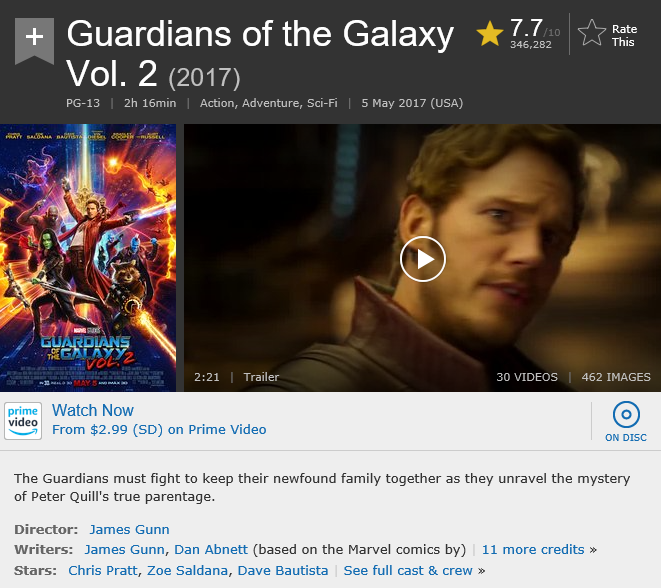

In [27]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen

In [9]:
# 불러오려는 url 입력하기 (IMDb - Guardians of the Galaxy Vol. 2 (2017) )
url = 'http://www.imdb.com/title/tt3896198/?ref_=nv_sr_6'

# urlopen 함수를 통해 web 변수를 생성
web = urlopen(url)

# BeautifulSoup으로 web 페이지상의 HTML 구조를 파싱
web_page = BeautifulSoup(web, 'html.parser')

In [10]:
# 영화 제목을 출력한다

title = web_page.find('h1')

print('Movie Title:')
print(title.get_text())

Movie Title:
Guardians of the Galaxy Vol. 2 (2017) 


In [30]:
# 영화 요약을 출력한다

summary = web_page.find(?, {?: ?})

print('Movie Summary:')
print(summary.get_text().strip())

Movie Summary:
The Guardians struggle to keep together as a team while dealing with their personal family issues, notably Star-Lord's encounter with his father the ambitious celestial being Ego.


In [31]:
# 감독 이름을 출력한다 (바깥의 box를 먼저 catch 후, 그 안의 tag를 catch!)

director = web_page.find('div', {'class': 'credit_summary_item'}).?(?)

print('Director:')
print(director.get_text().strip())

Director:
James Gunn


<br>
<br>

#### 3. 영화 리뷰를 출력하고 파일에 저장 하기
- 영화 Guardians of the Galaxy Vol. 2 리뷰 내용을 출력해 보자

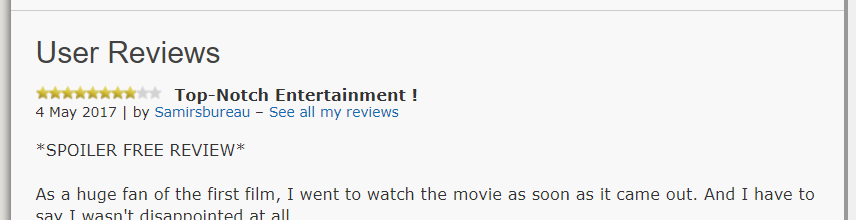

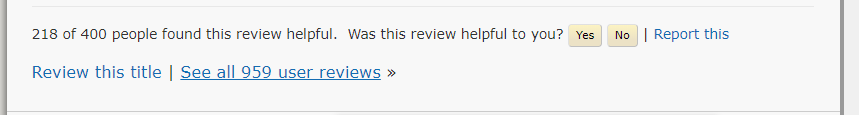

In [32]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [11]:
# 불러오려는 url 입력하기
url = 'http://www.imdb.com/title/tt3896198/reviews?ref_=tt_urv'

# urlopen 함수를 통해 web 변수를 생성
web = urlopen(url)

# BeautifulSoup으로 web 페이지상의 HTML 구조를 파싱
source = BeautifulSoup(web, 'html.parser')

In [35]:
# 리뷰 데이터를 출력하고 파일로 저장한다
reviews = source.find_all(?, {?: ?})

with open('moviereview.txt','w', encoding = "utf-8") as f:
    for review in reviews:
        print(review.get_text())
        f.write(review.get_text())

<br>
<br>

#### 4. 신문 기사 출력하고 저장하기
- 시애틀의 대표적인 신문 Seattle Times에서 글을 불러와 파일로 저장하기

In [31]:
# 불러오려는 url 입력하기
url = 'https://www.seattletimes.com/business/real-estate/zillows-zestimate-overvalued-a-washington-home-by-700-percent-in-a-case-of-algorithms-gone-wrong/'

# urlopen 함수를 통해 web 변수를 생성
web = urlopen(url)

# BeautifulSoup으로 web 페이지상의 HTML 구조를 파싱
source = BeautifulSoup(web, 'html.parser')
source

<!DOCTYPE html>

<!--[if lt IE 10]>      <html class="no-js lt-ie10 no-support" lang="en-US" itemscope itemtype="https://schema.org/Article" > <![endif]-->
<!--[if gt IE 9]><!-->
<html class="no-js" itemscope="" itemtype="https://schema.org/Article" lang="en-US">
<!--<![endif]-->
<head>
<link href="/apple-touch-icon.png?v=7kovnr5xE4" rel="apple-touch-icon" sizes="180x180"/>
<link href="/favicon-32x32.png?v=7kovnr5xE4" rel="icon" sizes="32x32" type="image/png"/>
<link href="/favicon-16x16.png?v=7kovnr5xE4" rel="icon" sizes="16x16" type="image/png"/>
<link href="/site.webmanifest?v=7kovnr5xE4" rel="manifest"/>
<link color="#5bbad5" href="/safari-pinned-tab.svg?v=7kovnr5xE4" rel="mask-icon"/>
<link href="/favicon.ico?v=7kovnr5xE4" rel="shortcut icon"/>
<meta content="#2b5797" name="msapplication-TileColor"/>
<meta content="#ffffff" name="theme-color"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible">
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.

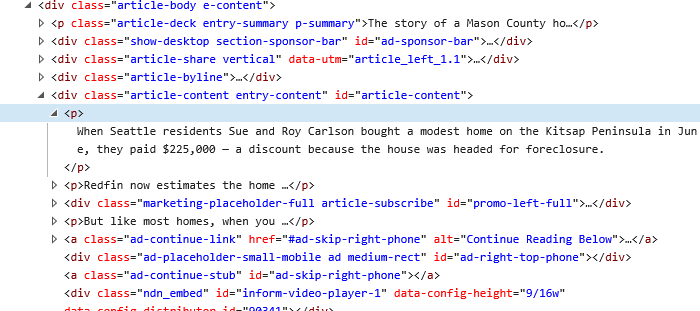

In [34]:
article = source.find('div',{'id': 'article-content'})
for tag in article.find_all('p'):
    print(tag.get_text())

When Seattle residents Sue and Roy Carlson bought a modest home on the Kitsap Peninsula in June, they paid $225,000 — a discount because the house was headed for foreclosure.
Redfin now estimates the home in Belfair, southwest of Bremerton, is worth $318,000. Realtor.com’s algorithm pegs the house at $268,000. And the county assessor has valued it at $283,000.
But like most homes, when you Google its address, the first thing that shows up is its Zillow page.
And according to that Zillow page, the home is now worth $1.8 million.
There’s no waterfront access, redevelopment potential or anything else significant about the property — in fact, it needs serious work. So how could an unremarkable three-bedroom home, located in a city where Zillow says the median home costs $286,000, be worth that much?
“I don’t have a clue where they came up with this number,” said Sue Carlson, 70. “It’s not worth anywhere near $1 million. They’re nuts.”
Carlson went on a mission to figure out how her home co

In [35]:
# Settle Times에 기사를 불러온다
with open('seattletimes.txt','w', encoding = 'utf-8') as f:
    
    times = source.find('div',{'id': 'article-content'})
    article = times.find_all('p')
    
    for content in article:
        print(content.get_text())
        f.write(content.get_text() + '\n')

When Seattle residents Sue and Roy Carlson bought a modest home on the Kitsap Peninsula in June, they paid $225,000 — a discount because the house was headed for foreclosure.
Redfin now estimates the home in Belfair, southwest of Bremerton, is worth $318,000. Realtor.com’s algorithm pegs the house at $268,000. And the county assessor has valued it at $283,000.
But like most homes, when you Google its address, the first thing that shows up is its Zillow page.
And according to that Zillow page, the home is now worth $1.8 million.
There’s no waterfront access, redevelopment potential or anything else significant about the property — in fact, it needs serious work. So how could an unremarkable three-bedroom home, located in a city where Zillow says the median home costs $286,000, be worth that much?
“I don’t have a clue where they came up with this number,” said Sue Carlson, 70. “It’s not worth anywhere near $1 million. They’re nuts.”
Carlson went on a mission to figure out how her home co

<br>
<br>

#### (Extra) Brunch 기사글 출력하고 저장하기
- 브런치 주간지에 실린 기사을 불러와 파일로 저장하기

In [36]:
# 불러오려는 url 입력하기
url = 'https://brunch.co.kr/@imagineer/267'

# urlopen 함수를 통해 web 변수를 생성
web = urlopen(url)

# BeautifulSoup으로 web 페이지상의 HTML 구조를 파싱
source = BeautifulSoup(web, 'html.parser')

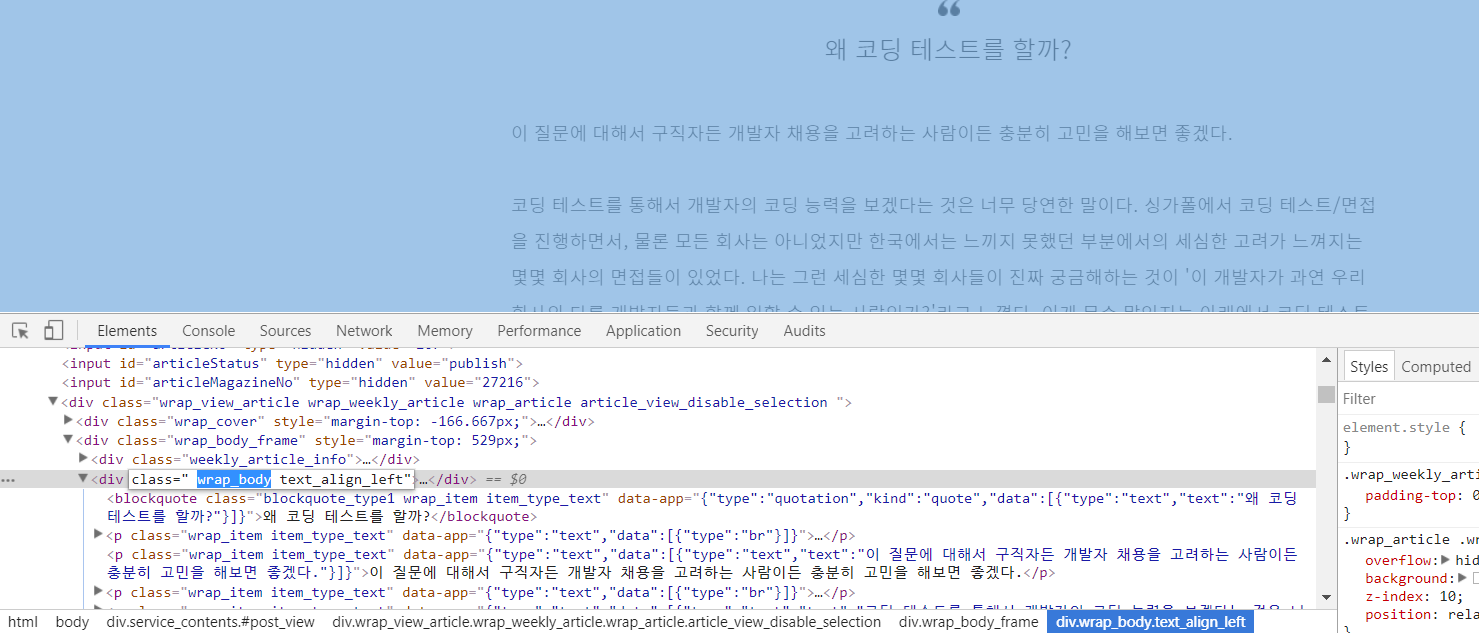

In [41]:
all_text = source.find('div',{'class': 'wrap_body'})
article = all_text.find_all('p')
for p in article:
    print(p.get_text())


이 질문에 대해서 구직자든 개발자 채용을 고려하는 사람이든 충분히 고민을 해보면 좋겠다.

코딩 테스트를 통해서 개발자의 코딩 능력을 보겠다는 것은 너무 당연한 말이다. 싱가폴에서 코딩 테스트/면접을 진행하면서, 물론 모든 회사는 아니었지만 한국에서는 느끼지 못했던 부분에서의 세심한 고려가 느껴지는 몇몇 회사의 면접들이 있었다. 나는 그런 세심한 몇몇 회사들이 진짜 궁금해하는 것이 '이 개발자가 과연 우리 회사의 다른 개발자들과 함께 일할 수 있는 사람인가?'라고 느꼈다. 이게 무슨 말인지는 아래에서 코딩 테스트 종류에 대한 설명을 보면서 알아보도록 하자.


내가 싱가폴에서 면접을 보면서 경험했던 코딩 테스트는 크게 3가지로 구분해볼 수 있다. '코딩 인터뷰 사이트', '온라인 실시간 면접', '과제 제출 후 오프라인 추가 면접' 이렇게인데, 아래에서 각각에 대해서 조금 더 자세하게 알아보자.

1) 코딩 인터뷰 사이트: Hackerrank, Codility

코딩 인터뷰로 유명한 위의 두 사이트에 대해 다른 글에서 소개한 적이 있으니 아래 링크를 참고하면 된다.
알고리즘 공부하지 마세요. 게임하세요! | 싱가포르에서 개발자로 구직을 하고 있다. 이미 싱가포르에 집도 계약하고 계약금도 다 치렀기 때문에 뒤로 물러설 곳도 없다. 나중에 따로 정리해서 올리겠지만, 오랜만에 이력서를 정리해서 관심이 있는 회사에 보내고, 헤드헌터들과 연락하고, 스카이프로 영어 면접을 진행하고 있다. 그중에 유명한 카드 회사에서는 코딩 테스트를 보자고 해서 코딩 테스트도 봤다. 개발
brunch.co.kr/@imagineer/250

간단하게 말하면 화이트보드 코딩 테스트를 온라인으로 옮겨놨다고 생각하면 된다. 보통은 1~3시간 정도의 주어진 시간 동안 3개 정도의 문제를 푼다. 지원자는 충분히 해당 플랫폼에서 연습하고, 자기가 테스트를 진행하고 싶은 시간에 편하게 보면 된다. 질문도 할 수 없다. 그냥 못 풀면 끝이다. 이런 사이트 링크를 받았다면, 그냥 개발자로서 기본적인 컴퓨

In [42]:
# Brunch 에 있는 글을 불러온다
with open('brunch.txt','w',encoding = 'utf-8') as f:
    
    all_text = source.find('div',{'class': 'wrap_body'})
    article = all_text.find_all('p')
    
    for content in article:
        print(content.get_text())
        f.write(content.get_text() + '\n')


이 질문에 대해서 구직자든 개발자 채용을 고려하는 사람이든 충분히 고민을 해보면 좋겠다.

코딩 테스트를 통해서 개발자의 코딩 능력을 보겠다는 것은 너무 당연한 말이다. 싱가폴에서 코딩 테스트/면접을 진행하면서, 물론 모든 회사는 아니었지만 한국에서는 느끼지 못했던 부분에서의 세심한 고려가 느껴지는 몇몇 회사의 면접들이 있었다. 나는 그런 세심한 몇몇 회사들이 진짜 궁금해하는 것이 '이 개발자가 과연 우리 회사의 다른 개발자들과 함께 일할 수 있는 사람인가?'라고 느꼈다. 이게 무슨 말인지는 아래에서 코딩 테스트 종류에 대한 설명을 보면서 알아보도록 하자.


내가 싱가폴에서 면접을 보면서 경험했던 코딩 테스트는 크게 3가지로 구분해볼 수 있다. '코딩 인터뷰 사이트', '온라인 실시간 면접', '과제 제출 후 오프라인 추가 면접' 이렇게인데, 아래에서 각각에 대해서 조금 더 자세하게 알아보자.

1) 코딩 인터뷰 사이트: Hackerrank, Codility

코딩 인터뷰로 유명한 위의 두 사이트에 대해 다른 글에서 소개한 적이 있으니 아래 링크를 참고하면 된다.
알고리즘 공부하지 마세요. 게임하세요! | 싱가포르에서 개발자로 구직을 하고 있다. 이미 싱가포르에 집도 계약하고 계약금도 다 치렀기 때문에 뒤로 물러설 곳도 없다. 나중에 따로 정리해서 올리겠지만, 오랜만에 이력서를 정리해서 관심이 있는 회사에 보내고, 헤드헌터들과 연락하고, 스카이프로 영어 면접을 진행하고 있다. 그중에 유명한 카드 회사에서는 코딩 테스트를 보자고 해서 코딩 테스트도 봤다. 개발
brunch.co.kr/@imagineer/250

간단하게 말하면 화이트보드 코딩 테스트를 온라인으로 옮겨놨다고 생각하면 된다. 보통은 1~3시간 정도의 주어진 시간 동안 3개 정도의 문제를 푼다. 지원자는 충분히 해당 플랫폼에서 연습하고, 자기가 테스트를 진행하고 싶은 시간에 편하게 보면 된다. 질문도 할 수 없다. 그냥 못 풀면 끝이다. 이런 사이트 링크를 받았다면, 그냥 개발자로서 기본적인 컴퓨

In [ ]:
for i in range(3):
    text = 'Python' + str(i)
    print(text)

In [49]:
# Save multiple articles automatically

# @imagineer 님의 글 10개를 자동으로 가져와 저장하는 코드를 작성해보세요!
# Hint 1 : str에는 str만 더할 수 있어요!
# Hint 2 : @imagineer님 글의 URL은 몇 번부터 시작할까요?

for i in range(10):
    try:
    
        url = 'https://brunch.co.kr/@imagineer/' + str(i)
        web = urlopen(url)
        source = BeautifulSoup(web, 'html.parser')

        with open('brunch_all.txt', 'a', encoding = 'utf-8') as f:

            all_text = source.find('div',{'class': 'wrap_body'})
            article = all_text.find_all('p')

            for content in article:
                print(content.get_text())
                f.write(content.get_text() + '\n')
                
    except:
        
        continue
        
# (Additional) 예외처리 (try & except pass 적용해보기)

결혼한 지 1년이 지났다. 지금도 너무 행복하지만 우리는 더 가슴 뛰는 삶을 살고 싶었고, 그러기 위해 더 치열하게 행복을 찾아다녔다. 우리 부부는 연말이 다가오면서 더 많은 이야기를 나눴다. 

그래서 2016년에는 한국을 떠나 1~2년 정도 외국에서 생활을 해보기로 마음 먹었다. 그렇게 시작된 살아보고 싶은 나라 목록 만들기에 이미 며칠의 시간이 걸렸다. 호주, 미국, 독일, 네덜란드, 영국, 스페인 등 여러 나라가 우선 후보에 올랐다. 서로 살아보고 싶은 나라를 이야기하고 거기서 일을 쉽게 구할 수 있을지도 알아봤다. 워킹홀리데이도 쉽게 비자를 얻을 수 있다는 점에서 찾아보던 중에 내년부터 칠레에 워킹홀리데이를 떠날 수 있다는 사실을 알게 되었다. 스페인에서 9개월, 브라질에서 3개월을 살아봤던 나에게는 남미에서 사는 결정은 크게 어렵지 않은 것이었겠지만, 부인도 호기심에 가득찬 표정으로 너무나 흔쾌히 가고 싶다고 말했다. 그 이후로는 일사천리. '어떻게하면 칠레에서도 재택이 가능한 일을 구해서, 안정적으로 칠레의 산티아고에 정착할 수 있을까?'라는 고민을 즐겁게 껴안은 채, 하나하나 준비해보기로 했다.

내년 말에 떠나게 되는 나라는 칠레가 아닐 수도 있다. 하지만 내가 사랑하는 사람과 새로운 환경에 처한다는 것은 언제나 즐거운 일이고 항상 나를 발전하게 하리라는 사실을 명백하다. 내일이 아니라, 바로 오늘 도전하면서 살고 싶다.
<인문학도, 개발자되다>의 목차이자 첫 글
1. 더 똑똑하게 일하고 싶다
2. 나는 전세계를 마주할 수 있는 비지니스를 하고 싶다
3. 대한민국 정부님께서 도와주셨다
4. 개발자로 일하기 시작하다
5. 직업으로의 개발자 깊게 이해하기
6. 좋은 스타트업 찾는 법
7. 남쪽에서 귀인을 만나다
8. 어떻게 개발을 공부해야 할까?
9. 오, 캡틴! 나의 캡틴!

같은 매거진 내 다른 글 <출퇴근 없는 삶>의 목차이자 첫 글
하나, 발리 - 디지털 노마드의 성지 | 발리를 떠올리면 어떤 이미지가 그려지는가? 인도네시아 최고의 휴양지 

아래 링크는 <외국어 덕후의 학습법> 첫 글이자 목차
하나, 뭐? 외국어 하나 정복 하는데, 6개월이면 충분하다고? | 영어 때문에 힘든 시절이 있었다. 고등학교를 마치고 서울에 올라 왔는데, 대학 동기들이 영어를 다들 너무 잘하더라. 다들 영미권 어느 나라에서 몇 년 살다왔노라 이야기를 들으면서
brunch.co.kr/@imagineer/5




외국어는 시간 투입이 많이 드는 취미다. 그리고 손을 놓으면 언제 공부했었냐는 듯이 하나도 기억이 안나는 놀라운 분야다. 외국어를 도전하는 많은 사람들이 주위에서 다들 하니까 시작하는 경우가 많다. '나도 외국어 하나쯤 해봐야 할 것 같은데'라는 접근은 십중팔구 포기로 이어진다. 실패도 의미가 있겠지만, 기왕이면 해내면 더 좋지 않을까? 뭐든지 좋으니 내가 그 외국어를 공부하는 이야가 있어야 한다. 거창할 필요도 없고, 그 언어로 책을 읽어보고 싶다든지, 그 나라 이성이 매력적이라든지, 그 나라에 한 번 살아보고 싶든지, 추상적이지 않은 이유가 있었으면 좋겠다.

나에게 외국어는 소통이다. 새로운 외국어를 하나 배우는 것은 새로운 세계의 문이 하나 열리는 것 같은 기분을 가져온다. 실제로 새로운 외국어를 통해 많은 친구를 사귀었고, 여러 나라를 여행했다. 한국과는 다른 세상을 접하며 내가 당연하다고 생각한 많은 것이 송두리째 무너지는 것을 느꼈다. 그리고 그 위에 새롭게 나를 만들어갔다. 그리고 앞으로 배우는 외국어 역시 나를 크게 성장 시켜 주리라 믿어 의심치 않는다.


내가 배우고 싶은 외국어를 정하는 데 나만의 원칙이 있다.

1. 가능한 많은 사람이 쓰는 언어
2. 영어로 생활이 가능하지 않은 나라의 언어
3. 전세계를 누비는데 도움이 될 수 있는 언어

그리고 이렇게 배운 외국어로 해보고 싶은 건,

- 나는 내가 구사하는 외국어로 책을 최소한 한 권씩 써보고 싶다.
- 한 나라의 소식을 한국의 언론의 시선으로 재가공한 형태가 아닌 그 사람들의 목소리로 들어보고 싶다.
- 문학 고전을 원서로 읽어 보고 